# Ejercicio 

El objetivo de este trabajo es hacer un análisis de los contratos menores del Ayuntamiento de Madrid desde 2015 para hacer una comparativa por años y ver qué empresas han resultado más beneficiadas.

### Conjunto de datos

Datos abiertos del Ayuntamiento de Madrid: [Contratos menores](http://aprendeconalf.es/python/trabajos/datos/contratos-menores-madrid.csv)

# Solución

## Preprocesamiento de datos

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from urllib.error import HTTPError

try:
    df = pd.read_csv('http://aprendeconalf.es/python/trabajos/datos/contratos-menores-madrid.csv', sep=';')
except HTTPError:
    print('La url no existe')
else:
    # Preprocesamiento de datos
    # # Ordenar el dataframe por años
    df = df.sort_values(['AÑO'])
    print(df)

AÑO                                           SECCION  \
14745  2017               COORDINACIÓN GENERAL DE LA ALCALDÍA   
11046  2017                                      MADRID SALUD   
11047  2017                                      MADRID SALUD   
11048  2017                                      MADRID SALUD   
11049  2017                                DISTRITO DE RETIRO   
...     ...                                               ...   
2092   2019  MADRID DESTINO, CULTURA, TURISMO Y NEGOCIO, S.A.   
2091   2019           ÁREA DE GOBIERNO DE ECONOMÍA Y HACIENDA   
2090   2019  MADRID DESTINO, CULTURA, TURISMO Y NEGOCIO, S.A.   
2088   2019  MADRID DESTINO, CULTURA, TURISMO Y NEGOCIO, S.A.   
0      2019             EMPRESA MUNICIPAL DE TRANSPORTES S.A.   

      TIPO DE CONTRATO         NIF  \
14745        SERVICIOS   F87116968   
11046        SERVICIOS   A79389920   
11047        SERVICIOS   A79800652   
11048        SERVICIOS   A80858103   
11049       SUMINISTRO   A80887201   

1. Crear una función que reciba una empresa y una lista de años y devuelva un diccionario con el número de contratos y el total facturado por la empresa esos años.

In [10]:
def empresa(df, nif):
    """
    Función que devuelve el nombre de la empresa con el nif dado.
    Parámetros:
        - df: Es un DataFrame con la información de la base de datos de los contratos menores.
        - nif: Es una cadena con el NIF del contratista.
    Devuelve:
        El nombre del contratista.
    """
    return df[df['NIF']==nif]['CONTRATISTA'].iloc[0]

In [11]:
def facturacion_empresa_años(df, nif, años):
    """
    Función que devuelve un diccionario con el número de contratos y el total facturado por la empresa durante una lista de años.
    Parámetros: 
        - df: Es un DataFrame con la información de la base de datos de los contratos menores.
        - nif: Es una cadena con el NIF del contratista.
        - años: Es una lista con los años. 
    Devuelve:
        Un diccionario con el número de contratos y el total facturado por la empresa con el nif dado durante los años indicados.
    """
    # Filtro de la empresa y los años
    df1 = df[(df['NIF'] == nif) & (df['AÑO'].isin(años))]
    return {'Número de contratos': df1['IMPORTE'].count(), 'Total facturado':df1['IMPORTE'].sum()}

# Ejemplo
print(facturacion_empresa_años(df, 'B28380582', [2018, 2019]))


{'Número de contratos': 28, 'Total facturado': 14818.130000000001}


2. Crear una función que reciba una sección y una lista de años y devuelva un diccionario con el número de contratos y el total facturado a la sección esos años.

In [12]:

def gasto_seccion_años(df, seccion, años):
    """
    Función que devuelve un diccionario con el número de contratos y el total gastado por una sección del ayuntamiento durante una lista de años.
    Parámetros: 
        - df: Es un DataFrame con la información de la base de datos de los contratos menores.
        - seccion: Es una cadena con la sección del ayuntamiento que ordena el gasto.
        - años: Es una lista con los años. 
    Devuelve:
        Un diccionario con el número de contratos y el total facturado por la empresa con el nif dado durante los años indicados.
    """
    # Filtro de la sección y los años
    df1 = df[(df['SECCION'] == seccion) & (df['AÑO'].isin(años))]
    return {'Número de contratos': df1['IMPORTE'].count(), 'Total gastado':df1['IMPORTE'].sum()}

# Ejemplo
print(gasto_seccion_años(df, 'EMPRESA MUNICIPAL DE TRANSPORTES S.A.', [2018, 2019]))


{'Número de contratos': 795, 'Total gastado': 2444316.26}


3. Crear una función que reciba una empresa, una sección y una lista de años y devuelva un diccionario con el número de contratos y el total facturado por la empresa a la sección esos años.

In [13]:
def facturacion_empresa_seccion_años(df, nif, seccion, años):
    """
    Función que devuelve un diccionario con el número de contratos y el total facturado por la empresa a una seccion durante una lista de años.
    Parámetros: 
        - df: Es un DataFrame con la información de la base de datos de los contratos menores.
        - nif: Es una cadena con el NIF del contratista.
        - seccion: Es una cadena con la sección del ayuntamiento que ordena el gasto.
        - años: Es una lista con los años. 
    Devuelve:
        Un diccionario con el número de contratos y el total facturado por la empresa con el nif dado a la sección dada durante los años indicados.
    """
    # Filtro de la empresa, la sección y los años
    df1 = df[(df['NIF'] == nif) & (df['SECCION'] == seccion) & (df['AÑO'].isin(años))]
    return {'Número de contratos': df1['IMPORTE'].count(), 'Total facturado':df1['IMPORTE'].sum()}

# Ejemplo
print(facturacion_empresa_seccion_años(df, 'B80176936', 'EMPRESA MUNICIPAL DE TRANSPORTES S.A.', [2018, 2019]))


{'Número de contratos': 9, 'Total facturado': 25674.75}


4. Crear una función que reciba una rango de años y un número entero n e imprima la lista de las n empresas que más han facturado durante esos años ordenadas de mayor a menor facturación y genere un gráfico con esa información.

NIF
DISTRIBUIDORA DE MATERIAL DE OFICINA S A                  383655.85
CONSULTORÍA ESTRATEGIA DE SERVICIOS Y TERRITOIOS, S.L.    258839.85
COMERCIAL DE SUMINISTROS PARA LA INFORMATICA SL           204561.35
WOLTERS KLUWER ESPAÑA, S.A.                               177396.18
EXTERION MEDIA SPAIN S A                                  174259.45
FERROVIAL SERVICIOS SA                                    173038.35
INMASUR, S.L.                                             172368.29
SERANCO SA                                                155129.08
ORTIZ CONSTRUCCIONES Y PROYECTOS SA                       143953.33
UNIVERSIDAD COMPLUTENSE DE MADRID                         143802.28
Name: IMPORTE, dtype: float64


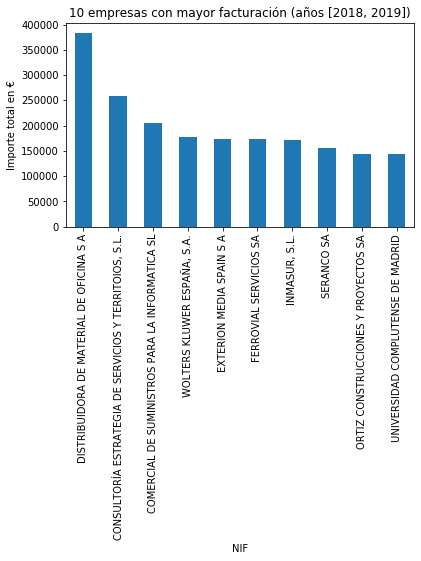

In [14]:
def empresas_mayor_facturacion(df, años, n = 10):
    """
    Función que imprime una tabla con las n empresas que más han facturado durante los años indicados y genera un gráfico con esa información.
    Parámetros: 
        - df: Es un DataFrame con la información de la base de datos de los contratos menores.
        - años: Es una lista con los años. 
        - n: Es el número de empresas en la tabla (10 por defecto)
    """
    # Filtro de los años
    df1 = df[df['AÑO'].isin(años)]
    # Agrupar por empresas
    df1 = df1.groupby('NIF')['IMPORTE'].sum()
    # Ordenar descendentemente por importe
    df1 = df1.sort_values(ascending=False)
    # Obtener los n primeros y establecer el nombre de la empresa como índice.
    df1 = df1[:n].rename(lambda x: empresa(df, x))
    # Imprimirlos
    print(df1)
    # Inicializamos el gráfico
    fig, ax = plt.subplots(figsize=(6, 8))
    # Dibujar el diagrama de barras
    df1.plot(kind = 'bar', ax = ax)
    # Título del gráfico
    ax.set_title(str(n) + ' empresas con mayor facturación (años ' + str(años) + ')')
    # Título del eje x
    ax.set_ylabel('Importe total en €')
    # Ajustar los márgenes del gráfico
    plt.tight_layout()
    plt.gcf().subplots_adjust(bottom=0.6)
    # Guardamos el gráfico
    plt.show()
    return

# Ejemplo
empresas_mayor_facturacion(df, [2018,2019], n = 10)

5. Crear una función reciba una rango de años y un número entero n y genere un gráfico con la evolución anual del total facturado por las n empresas que más han facturado.

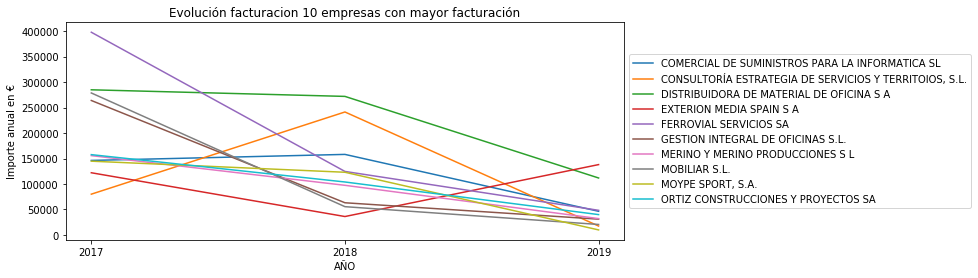

In [15]:
def evolucion_empresas_mayor_facturacion(df, inicio, fin, n = 10):
    """
    Función que crea un gráfico con la evolución anual del total facturado por las n empresas con mayor facturación en un rango de años dado.
    Parámetros:
        - df: Es un DataFrame con la información de la base de datos de emisiones.
        - inicio: Es un entero con el año inicial.
        - fin: Es un entero con el año final.
        - n: Es el número de empresas en el gráfico (10 por defecto)
    """
     # Filtro de los años
    df1 = df[(df['AÑO'] >= inicio) & (df['AÑO'] <= fin)]
    # Agrupar por empresas
    df2 = df1.groupby('NIF')['IMPORTE'].sum()
    # Ordenar descendentemente por importe
    df2 = df2.sort_values(ascending = False)
    # Obtener la lista de los nifs de las n empresas con mayor facturación
    nifs = df2[:n].index
    # Filtrar las n empresas con mayor facturación en el rango de años
    df1 = df1[df1['NIF'].isin(list(nifs))]
    # Agrupar por años y empresas
    df1 = df1.groupby(['AÑO', 'NIF'])['IMPORTE'].sum()
    # Establecer como índice el nombre de la empresa
    df1 = df1.rename(lambda x: empresa(df, x), level = 1)
    # Inicializamos el gráfico
    fig, ax = plt.subplots(figsize=(10, 4))
    # Desagrupamos por empresas y generamos el gráfico de líneas
    df1.unstack().plot(legend = True, ax = ax)
    # Dibujar la leyenda fuera del área del gráfico
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    # Título del gráfico
    ax.set_title('Evolución facturacion ' + str(n) + ' empresas con mayor facturación')
    # Título del eje x
    ax.set_ylabel('Importe anual en €')
    # Establecer las marcas del eje x
    ax.set_xticks(range(inicio, fin+1))
    # Ajustar los márgenes del gráfico
    # plt.tight_layout()
    # Guardamos el gráfico.
    plt.show()
    return

# Ejemplo
evolucion_empresas_mayor_facturacion(df, 2017, 2019)

6. Crear una función reciba una rango de años y genere un gráfico con la evolución anual del total facturado a las secciones.

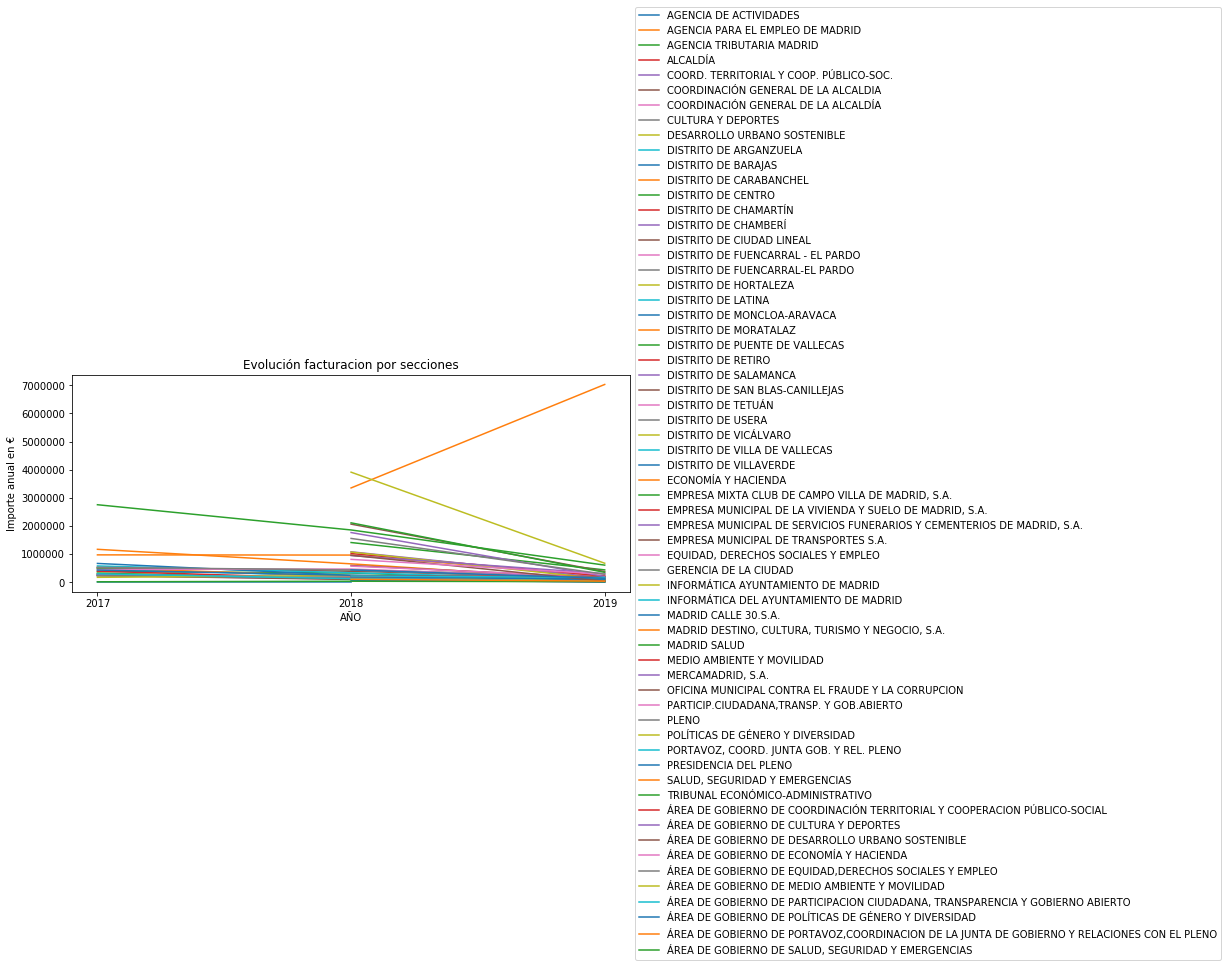

In [16]:
def evolucion_facturacion_secciones(df, inicio, fin):
    """
    Función que crea un gráfico con la evolución de la facturacion anual por secciones en un rango de años dado.
    Parámetros:
        - df: Es un DataFrame con la información de la base de datos de emisiones.
        - inicio: Es un entero con el año inicial.
        - fin: Es un entero con el año final.
    """
     # Filtro de los años
    df1 = df[(df['AÑO'] >= inicio) & (df['AÑO'] <= fin)]
    # Agrupar por años y secciones
    df1 = df1.groupby(['AÑO', 'SECCION'])['IMPORTE'].sum()
    # Inicializamos el gráfico
    fig, ax = plt.subplots(figsize=(10, 4))
    # Desagrupamos por secciones y generamos el gráfico de líneas
    df1.unstack().plot(legend = True, ax = ax)
    # Dibujar la leyenda fuera del área del gráfico
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    # Título del gráfico
    ax.set_title('Evolución facturacion por secciones')
    # Título del eje x
    ax.set_ylabel('Importe anual en €')
    # Establecer las marcas del eje x
    ax.set_xticks(range(inicio, fin+1))
    # Guardamos el gráfico.
    plt.show()
    return

# Ejemplo
evolucion_facturacion_secciones(df, 2017, 2019)